# EDA

## Import and Load data

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks'

In [4]:
!cd /Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/ && ls

zsh:cd:1: no such file or directory: ../data/mimiciii/1.4/


In [5]:
!ls

Dataset               Medication-Trend      eda.ipynb
Drugs                 Others                mimic_extract.ipynb
Medication            Prescription          sql_queries
Medication-Regression bmi.ipynb


## Data Preprocessing

In [11]:
admissions = pd.read_csv('/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/raw/ADMISSIONS.csv.gz')

In [12]:
admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [6]:
patients = pd.read_csv('/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/raw/PATIENTS.csv.gz')

In [7]:
patients

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
46515,31840,44089,M,2026-05-25 00:00:00,NaN,NaN,NaN,0
46516,31841,44115,F,2124-07-27 00:00:00,NaN,NaN,NaN,0
46517,31842,44123,F,2049-11-26 00:00:00,2135-01-12 00:00:00,2135-01-12 00:00:00,NaN,1
46518,31843,44126,F,2076-07-25 00:00:00,NaN,NaN,NaN,0


In [8]:
patients['DOB'] = pd.to_datetime(patients['DOB']).dt.date

In [15]:
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME']).dt.date

In [16]:
admissions.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [13]:
patients.columns

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG'],
      dtype='object')

In [14]:
admissions = admissions.sort_values(['SUBJECT_ID', 'ADMITTIME']).groupby('SUBJECT_ID').nth(0).reset_index()

In [15]:
temp = pd.merge(admissions, patients, how='inner', on='SUBJECT_ID')

In [16]:
temp['ADMITTIME'], temp['DOB']

(0        2138-07-17
 1        2101-10-20
 2        2191-03-16
 3        2103-02-02
 4        2175-05-30
             ...    
 46515    2181-01-27
 46516    2184-12-24
 46517    2144-07-25
 46518    2147-02-08
 46519    2117-12-30
 Name: ADMITTIME, Length: 46520, dtype: object,
 0        2138-07-17
 1        2025-04-11
 2        2143-05-12
 3        2103-02-02
 4        2109-06-21
             ...    
 46515    2127-04-08
 46516    2137-04-07
 46517    2078-10-17
 46518    2058-05-29
 46519    2054-01-06
 Name: DOB, Length: 46520, dtype: object)

In [17]:
temp.apply(lambda r: round((r['ADMITTIME']-r['DOB']).days/365, 0), axis=1)

0         0.0
1        77.0
2        48.0
3         0.0
4        66.0
         ... 
46515    54.0
46516    48.0
46517    66.0
46518    89.0
46519    64.0
Length: 46520, dtype: float64

In [18]:
temp.apply(lambda r: round((r['ADMITTIME']-r['DOB']).days/365, 1), axis=1)

0         0.0
1        76.6
2        47.9
3         0.0
4        66.0
         ... 
46515    53.8
46516    47.7
46517    65.8
46518    88.8
46519    64.0
Length: 46520, dtype: float64

In [19]:
temp['AGE'] = temp.apply(lambda r: round((r['ADMITTIME']-r['DOB']).days/365, 0), axis=1)

In [20]:
temp = temp[temp['AGE']<100]

## Age

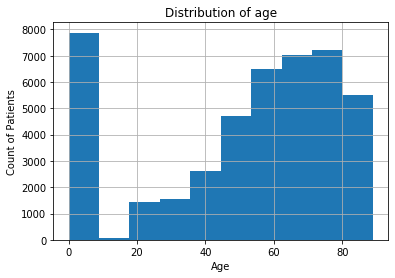

In [21]:
import matplotlib.pyplot as plt
temp['AGE'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')
plt.savefig('../plots/analysis/age.png')

In [22]:
admissions['SUBJECT_ID']

0            2
1            3
2            4
3            5
4            6
         ...  
46515    99985
46516    99991
46517    99992
46518    99995
46519    99999
Name: SUBJECT_ID, Length: 46520, dtype: int64

In [23]:
temp.columns

Index(['SUBJECT_ID', 'ROW_ID_x', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'AGE'],
      dtype='object')

## Gender

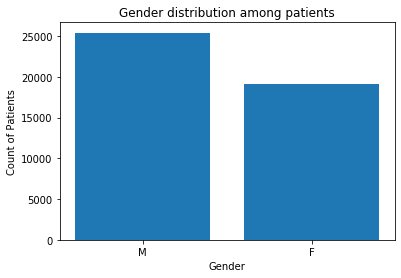

In [24]:
gender_dict = temp['GENDER'].value_counts().to_dict()
plt.bar(gender_dict.keys(), gender_dict.values())
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.title('Gender distribution among patients')
plt.savefig('../plots/analysis/gender.png')

## Ethinicity

In [28]:
ethnicity = temp['ETHNICITY'].value_counts().to_dict()

In [40]:
len(list(ethnicity.keys()))

41

[]

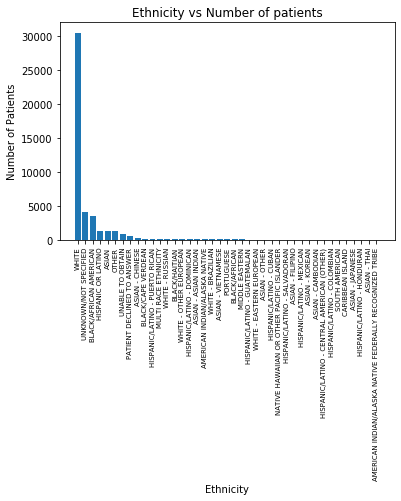

In [53]:
plt.bar(list(ethnicity.keys()), list(ethnicity.values()))
plt.xticks(fontsize=7, rotation=90)
plt.xlabel('Ethnicity')
plt.ylabel('Number of Patients')
plt.title('Ethnicity vs Number of patients')
plt.savefig('../plots/analysis/ethnicity.png')
plt.plot()

## Others

In [55]:
temp.columns

Index(['SUBJECT_ID', 'ROW_ID_x', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'AGE'],
      dtype='object')

In [58]:
temp

,SUBJECT_ID,ROW_ID_x,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE
0,2,1,163353,2138-07-17,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,0,1,1,M,2138-07-17,NaN,NaN,NaN,0,0.0
1,3,2,145834,2101-10-20,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,0,1,2,M,2025-04-11,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,77.0
2,4,3,185777,2191-03-16,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,0,1,3,F,2143-05-12,NaN,NaN,NaN,0,48.0
3,5,4,178980,2103-02-02,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,0,1,4,M,2103-02-02,NaN,NaN,NaN,0,0.0
4,6,5,107064,2175-05-30,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,0,1,5,F,2109-06-21,NaN,NaN,NaN,0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46515,99985,58972,176670,2181-01-27,2181-02-12 17:05:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,0,1,46516,M,2127-04-08,NaN,NaN,NaN,0,54.0
46516,99991,58973,151118,2184-12-24,2185-01-05 12:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Private,...,0,1,46517,M,2137-04-07,NaN,NaN,NaN,0,48.0
46517,99992,58974,197084,2144-07-25,2144-07-28 17:56:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicare,...,0,1,46518,F,2078-10-17,NaN,NaN,NaN,0,66.0
46518,99995,58975,137810,2147-02-08,2147-02-11 13:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,Medicare,...,0,1,46519,F,2058-05-29,2147-09-29 00:00:00,NaN,2147-09-29 00:00:00,1,89.0


In [61]:
bmi_data = pd.read_csv('/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/preprocessed/bmi.csv').drop(columns=['Unnamed: 0'])

In [62]:
patient_data = temp
age = patient_data[['SUBJECT_ID', 'HADM_ID', 'AGE']]
gender = patient_data[['SUBJECT_ID', 'HADM_ID', 'GENDER']]

In [63]:
bmi_data.shape, age.shape, gender.shape

((18478, 6), (44529, 3), (44529, 3))

In [70]:
pd.merge(bmi_data, gender, how='inner', on=['HADM_ID', 'SUBJECT_ID'])

,HADM_ID,SUBJECT_ID,HEIGHT,WEIGHT,CHARTTIME,BMI,GENDER
0,100009,533,1.8300,117.700000,2162-05-17 16:37:00,35.145869,M
1,100012,60039,1.7800,92.500000,2177-03-14 12:43:00,29.194546,M
2,100016,68591,1.3700,50.600000,2188-05-24 16:07:00,26.959348,M
3,100017,16229,1.7272,83.699997,2103-03-11 09:04:00,28.056932,M
4,100018,58128,1.7800,123.500000,2176-08-30 15:07:00,38.978664,M
...,...,...,...,...,...,...,...
18473,199986,5887,1.5748,54.000000,2188-10-30 20:58:00,21.774237,F
18474,199988,25780,1.6256,78.900002,2169-02-08 17:51:00,29.857238,M
18475,199993,20785,1.6256,68.699997,2161-10-23 18:37:00,25.997365,M
18476,199995,19412,1.8288,78.000000,2137-12-20 19:01:00,23.321806,M


In [71]:
bmi_e = (20,25)
gender_e = 'M'
age_e = (50,60)

bmi_data = bmi_data[bmi_data['BMI']<=bmi_e[1]]
bmi_data = bmi_data[bmi_data['BMI']>=bmi_e[0]]

age = age[age['AGE']>=age_e[0]]
age = age[age['AGE']<=age_e[1]]

if gender_e=='M':
    gender = gender[gender['GENDER']=='M']
elif gender_e=='F':
    gender = gender[gender['GENDER']=='F']

final_data = pd.merge(age, pd.merge(bmi_data, gender, how='inner', on=['HADM_ID', 'SUBJECT_ID']), how='inner', on=['HADM_ID', 'SUBJECT_ID'])

final_data

,SUBJECT_ID,HADM_ID,AGE,HEIGHT,WEIGHT,CHARTTIME,BMI,GENDER
0,41,101757,57.0,1.8796,75.000000,2133-01-03 09:01:00,21.229042,M
1,79,181542,52.0,1.7780,77.199997,2175-09-26 02:34:00,24.420456,M
2,252,190159,55.0,1.8796,87.000000,2133-03-31 19:58:00,24.625688,M
3,457,166305,54.0,1.6510,61.000000,2146-01-31 12:23:00,22.378743,M
4,571,193189,57.0,1.7272,64.000000,2106-10-12 18:52:00,21.453330,M
...,...,...,...,...,...,...,...,...
459,98952,151098,58.0,1.8000,79.650000,2145-08-12 08:52:00,24.583333,M
460,98961,104381,58.0,1.7900,66.400000,2118-01-21 02:26:00,20.723448,M
461,99115,132152,51.0,1.7500,65.500000,2193-12-29 18:52:00,21.387755,M
462,99897,162913,54.0,1.7500,74.350000,2181-08-06 04:32:00,24.277551,M


In [72]:
final_data.describe()

,SUBJECT_ID,HADM_ID,AGE,HEIGHT,WEIGHT,BMI
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,38794.010776,152203.435345,55.178879,1.764246,71.902435,23.055128
std,30086.189141,29253.926478,3.147955,0.079403,7.725617,1.344897
min,41.000000,100817.000000,50.000000,1.550000,52.900000,20.030793
25%,13509.500000,128667.250000,52.000000,1.701800,65.987500,22.011312
50%,27884.500000,151283.500000,55.500000,1.758950,71.300002,23.367532
75%,65231.500000,178752.000000,58.000000,1.822200,77.199997,24.218798
max,99985.000000,199955.000000,60.000000,2.082800,99.650002,24.992482


In [76]:
k= ['None']
k = k if k is not None else ['bmi', 'gender', 'age', 'ethnicity', 'length_stay', 'mortality']

In [77]:
k

['None']

## Stratification

In [158]:
BASE_DIR = '/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab'

In [159]:
import os
import sys
sys.path.insert(0, os.path.abspath('/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/src'))

from preprocess.stratify import Stratify
s = Stratify('mimiciii_trial', '/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/', between_meds=(1,2), bmi=(1,100), age=(50,60), gender='M', ethnicity='WHITE')

stratify/stratify.py [Class: Stratify Func: __init__] INFO : Started stratification


/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/


dataset/dataset.py [Class: Stratify Func: __init__] INFO : Started loading data from mimiciii_trial dataset...
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loading dob_patient_bins data...
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loaded dob_patient_bins
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loading admissions data...
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loaded admissions
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loading labevents data...
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loaded labevents
dataset/dataset.py [Class: Stratify Func: load_data] INFO : Loading inputevents_mv data...
/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/src/preprocess/dataset.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

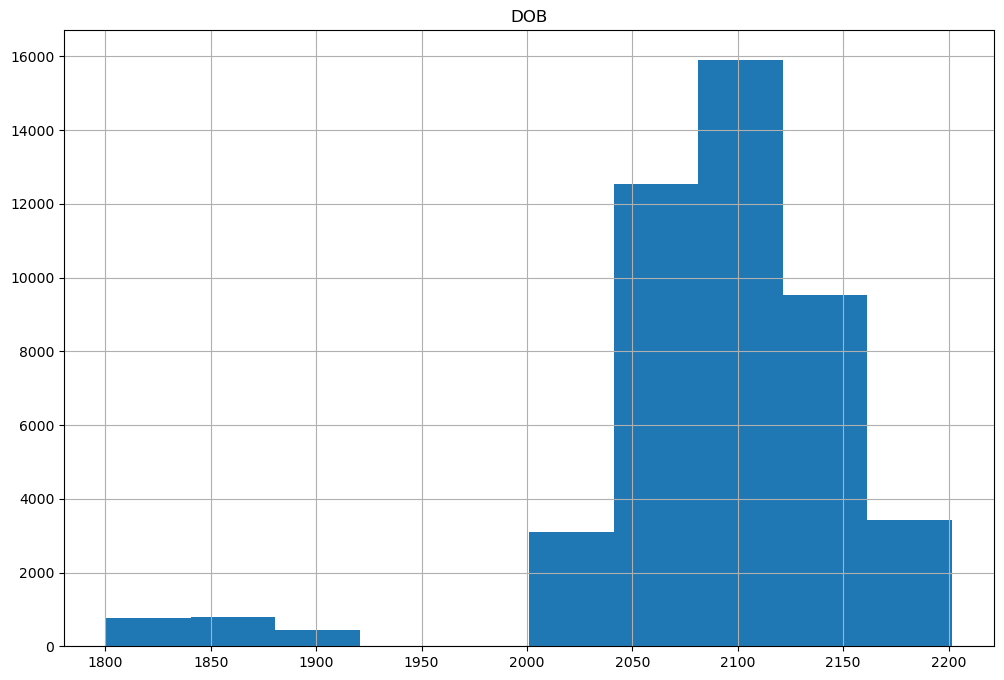

In [37]:
from preprocess.stratify import Stratify
s = Stratify('mimiciii_trial', '/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/', between_meds=(1,2), bmi=(1,100), age=(50,60), gender='M', ethnicity='WHITE')

In [38]:
s

In [39]:
s.stratified

,SUBJECT_ID,HADM_ID,AGE,HEIGHT,WEIGHT,CHARTTIME,BMI,GENDER,ETHNICITY
0,487,160958,58.0,1.8034,103.699997,2130-10-31 12:47:00,31.885601,M,WHITE
1,500,141591,60.0,1.7780,114.549999,2200-03-19 18:13:00,36.235276,M,WHITE
2,571,193189,57.0,1.7272,64.000000,2106-10-12 18:52:00,21.453330,M,WHITE
3,589,175721,54.0,1.6510,89.900002,2164-07-06 00:12:00,32.981132,M,WHITE
4,603,104325,54.0,1.7526,91.900002,2112-09-02 15:49:00,29.919195,M,WHITE
...,...,...,...,...,...,...,...,...,...
968,32756,169850,60.0,1.7780,113.000000,2189-09-02 19:31:00,35.744969,M,WHITE
969,32757,106781,53.0,1.7272,67.699997,2194-09-02 12:56:00,22.693600,M,WHITE
970,32758,132411,60.0,1.9558,112.199997,2113-10-03 12:50:00,29.332154,M,WHITE
971,32786,165351,54.0,1.8288,122.300003,2152-11-15 23:02:00,36.567397,M,WHITE


In [40]:
l = s.patient_presc['inputevents']['HADM_ID'].unique()
t = s.stratified
t[t['HADM_ID'].isin(l)]

,SUBJECT_ID,HADM_ID,AGE,HEIGHT,WEIGHT,CHARTTIME,BMI,GENDER,ETHNICITY
813,27469,126534,50.0,1.8288,164.000000,2174-08-25 06:46:00,49.035592,M,WHITE
815,27594,137829,52.0,1.8034,80.300003,2183-08-03 17:02:00,24.690588,M,WHITE
931,31514,114047,51.0,1.7780,82.000000,2175-07-31 08:57:00,25.938827,M,WHITE
940,31836,106153,56.0,1.7780,117.199997,2187-09-03 02:48:00,37.073543,M,WHITE
967,32739,147621,53.0,1.6764,80.000000,2186-08-13 13:25:00,28.466540,M,WHITE


In [41]:
t = s.patient_presc['inputevents']
l = s.stratified['HADM_ID'].unique()
t[t['HADM_ID'].isin(l)]

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,LABEL,CATEGORY,PARAM_TYPE
697318,31836,106153,261978.0,2187-09-04 12:00:00,2187-09-04 12:01:00,226361,680.000000,ml,mL,16-Pre Admission,Pre-Admission Intake,Fluids/Intake,Solution
1050913,31836,106153,261978.0,2187-09-04 14:23:00,2187-09-04 14:24:00,226452,100.000000,ml,mL,14-Oral/Gastric Intake,PO Intake,Fluids/Intake,Solution
318433,31514,114047,290069.0,2175-08-01 11:57:00,2175-08-05 15:52:00,225158,999.999992,ml,mL,02-Fluids (Crystalloids),NaCl 0.9%,Fluids/Intake,Solution
697325,31514,114047,290069.0,2175-08-01 12:07:00,2175-08-01 12:08:00,226361,12000.000000,ml,mL,16-Pre Admission,Pre-Admission Intake,Fluids/Intake,Solution
233540,31514,114047,290069.0,2175-08-01 12:11:00,2175-08-01 12:12:00,225797,480.000000,ml,mL,14-Oral/Gastric Intake,Free Water,Fluids/Intake,Solution
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969967,32739,147621,294198.0,2186-08-12 23:20:00,2186-08-13 23:20:00,226027,120.000004,ml,mL,13-Enteral Nutrition,Impact with Fiber (1/2),Nutrition - Enteral,Solution
468985,32739,147621,294198.0,2186-08-17 04:29:00,2186-08-17 15:44:00,220949,249.999993,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
1969969,32739,147621,294198.0,2186-08-17 04:29:00,2186-08-17 15:44:00,221289,2.000000,mg,mg,01-Drips,Epinephrine,Medications,Solution
468967,32739,147621,294198.0,2186-08-17 04:30:00,2186-08-18 03:01:00,220949,250.000010,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution


In [42]:
s.patient_presc['inputevents']

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,LABEL,CATEGORY,PARAM_TYPE
697318,31836,106153,261978.0,2187-09-04 12:00:00,2187-09-04 12:01:00,226361,680.000000,ml,mL,16-Pre Admission,Pre-Admission Intake,Fluids/Intake,Solution
1050913,31836,106153,261978.0,2187-09-04 14:23:00,2187-09-04 14:24:00,226452,100.000000,ml,mL,14-Oral/Gastric Intake,PO Intake,Fluids/Intake,Solution
318433,31514,114047,290069.0,2175-08-01 11:57:00,2175-08-05 15:52:00,225158,999.999992,ml,mL,02-Fluids (Crystalloids),NaCl 0.9%,Fluids/Intake,Solution
697325,31514,114047,290069.0,2175-08-01 12:07:00,2175-08-01 12:08:00,226361,12000.000000,ml,mL,16-Pre Admission,Pre-Admission Intake,Fluids/Intake,Solution
233540,31514,114047,290069.0,2175-08-01 12:11:00,2175-08-01 12:12:00,225797,480.000000,ml,mL,14-Oral/Gastric Intake,Free Water,Fluids/Intake,Solution
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969967,32739,147621,294198.0,2186-08-12 23:20:00,2186-08-13 23:20:00,226027,120.000004,ml,mL,13-Enteral Nutrition,Impact with Fiber (1/2),Nutrition - Enteral,Solution
468985,32739,147621,294198.0,2186-08-17 04:29:00,2186-08-17 15:44:00,220949,249.999993,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
1969969,32739,147621,294198.0,2186-08-17 04:29:00,2186-08-17 15:44:00,221289,2.000000,mg,mg,01-Drips,Epinephrine,Medications,Solution
468967,32739,147621,294198.0,2186-08-17 04:30:00,2186-08-18 03:01:00,220949,250.000010,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution


In [48]:
t = s.patient_presc['inputevents'][s.patient_presc['inputevents']['HADM_ID']==147621]

In [49]:
t

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,LABEL,CATEGORY,PARAM_TYPE
468987,32739,147621,294198.0,2186-08-12 22:16:00,2186-08-13 16:17:00,220949,250.000005,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
1854681,32739,147621,294198.0,2186-08-12 22:16:00,2186-08-13 16:17:00,221662,400.000009,mg,mg,01-Drips,Dopamine,Medications,Solution
468966,32739,147621,294198.0,2186-08-12 22:17:00,2186-08-15 00:17:00,220949,250.000008,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
778116,32739,147621,294198.0,2186-08-12 22:17:00,2186-08-15 00:17:00,221744,2.500000,mg,mg,01-Drips,Fentanyl,Medications,Solution
318700,32739,147621,294198.0,2186-08-12 22:18:00,2186-08-13 18:18:00,225158,100.000003,ml,mL,01-Drips,NaCl 0.9%,Fluids/Intake,Solution
741919,32739,147621,294198.0,2186-08-12 22:18:00,2186-08-13 18:18:00,221668,99.999998,mg,mg,01-Drips,Midazolam (Versed),Medications,Solution
1840562,32739,147621,294198.0,2186-08-12 22:49:00,2186-08-13 06:49:00,225941,999.999984,ml,mL,02-Fluids (Crystalloids),D5 1/4NS,Fluids/Intake,Solution
971862,32739,147621,294198.0,2186-08-12 23:01:00,2186-08-13 04:01:00,225168,375.000000,ml,mL,07-Blood Products,Packed Red Blood Cells,Blood Products/Colloids,Solution
458212,32739,147621,294198.0,2186-08-12 23:05:00,2186-08-12 23:06:00,225892,1.000000,dose,dose,08-Antibiotics (IV),Piperacillin,Antibiotics,Solution
468986,32739,147621,294198.0,2186-08-12 23:05:00,2186-08-12 23:06:00,220949,100.000000,ml,mL,08-Antibiotics (IV),Dextrose 5%,Fluids/Intake,Solution


In [50]:
t[t['LABEL']=='Dextrose 5%']

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,LABEL,CATEGORY,PARAM_TYPE
468987,32739,147621,294198.0,2186-08-12 22:16:00,2186-08-13 16:17:00,220949,250.000005,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
468966,32739,147621,294198.0,2186-08-12 22:17:00,2186-08-15 00:17:00,220949,250.000008,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
468986,32739,147621,294198.0,2186-08-12 23:05:00,2186-08-12 23:06:00,220949,100.000000,ml,mL,08-Antibiotics (IV),Dextrose 5%,Fluids/Intake,Solution
468965,32739,147621,294198.0,2186-08-12 23:19:00,2186-08-12 23:20:00,220949,50.000000,ml,mL,08-Antibiotics (IV),Dextrose 5%,Fluids/Intake,Solution
468985,32739,147621,294198.0,2186-08-17 04:29:00,2186-08-17 15:44:00,220949,249.999993,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution
468967,32739,147621,294198.0,2186-08-17 04:30:00,2186-08-18 03:01:00,220949,250.000010,ml,mL,01-Drips,Dextrose 5%,Fluids/Intake,Solution


In [54]:
s.lab_measurements['inputevents']

,SUBJECT_ID,HADM_ID,LABEL,VALUENUM,VALUEUOM,CHARTTIME
122638,27469,126534.0,"Calcium, Total",8.3,mg/dL,2174-09-20 16:32:00
124065,27469,126534.0,"Calcium, Total",8.3,mg/dL,2174-09-14 01:09:00
124212,27469,126534.0,"Calcium, Total",8.1,mg/dL,2174-09-12 13:35:00
124226,27469,126534.0,"Calcium, Total",8.2,mg/dL,2174-09-13 02:21:00
126652,27594,137829.0,"Calcium, Total",7.9,mg/dL,2183-08-03 17:32:00
...,...,...,...,...,...,...
7845824,32739,147621.0,Triiodothyronine (T3),60.0,ng/dL,2186-08-28 05:13:00
7861132,32739,147621.0,"Thyroxine (T4), Free",1.8,ng/dL,2186-08-28 05:13:00
7865468,31514,114047.0,Vitamin B12,1351.0,pg/mL,2175-08-14 06:15:00
7865562,32739,147621.0,Vitamin B12,1140.0,pg/mL,2186-08-23 02:45:00


In [55]:
s.med1[s.med1['SUBJECT_ID']==32739]

,HADM_ID,LABEL,SUBJECT_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE
81,147621,Cefepime,32739,294198.0,2186-08-12 23:19:00,2186-08-12 23:20:00,225851,1.000000,dose,dose,08-Antibiotics (IV),Antibiotics,Solution
82,147621,D5 1/4NS,32739,294198.0,2186-08-12 22:49:00,2186-08-13 06:49:00,225941,999.999984,ml,mL,02-Fluids (Crystalloids),Fluids/Intake,Solution
83,147621,Dextrose 5%,32739,294198.0,2186-08-12 22:16:00,2186-08-13 16:17:00,220949,250.000005,ml,mL,01-Drips,Fluids/Intake,Solution
84,147621,Dobutamine,32739,294198.0,2186-08-17 04:30:00,2186-08-18 03:01:00,221653,249.999997,mg,mg,01-Drips,Medications,Solution
85,147621,Dopamine,32739,294198.0,2186-08-12 22:16:00,2186-08-13 16:17:00,221662,400.000009,mg,mg,01-Drips,Medications,Solution
86,147621,Epinephrine,32739,294198.0,2186-08-17 04:29:00,2186-08-17 15:44:00,221289,2.000000,mg,mg,01-Drips,Medications,Solution
87,147621,Fentanyl,32739,294198.0,2186-08-12 22:17:00,2186-08-15 00:17:00,221744,2.500000,mg,mg,01-Drips,Medications,Solution
88,147621,Impact with Fiber (1/2),32739,294198.0,2186-08-12 23:20:00,2186-08-13 23:20:00,226027,120.000004,ml,mL,13-Enteral Nutrition,Nutrition - Enteral,Solution
89,147621,Midazolam (Versed),32739,294198.0,2186-08-12 22:18:00,2186-08-13 18:18:00,221668,99.999998,mg,mg,01-Drips,Medications,Solution
90,147621,NaCl 0.9%,32739,294198.0,2186-08-12 22:18:00,2186-08-13 18:18:00,225158,100.000003,ml,mL,01-Drips,Fluids/Intake,Solution


In [56]:
s.med2[s.med2['SUBJECT_ID']==32739]

,HADM_ID,LABEL,SUBJECT_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE
62,147621,Dextrose 5%,32739,294198.0,2186-08-12 22:17:00,2186-08-15 00:17:00,220949,250.000008,ml,mL,01-Drips,Fluids/Intake,Solution


## Analysis

In [57]:
s.lab_measurements['inputevents']['LABEL'].value_counts()

Hematocrit                       146
Hemoglobin                       129
Urea Nitrogen                    127
Red Blood Cells                  123
Glucose                          122
                                ... 
D-Dimer                            1
Transferrin                        1
Reticulocyte Count, Automated      1
C-Reactive Protein                 1
Prostate Specific Antigen          1
Name: LABEL, Length: 72, dtype: int64

In [58]:
s.med1['LABEL'].value_counts()

NaCl 0.9%                          4
Dextrose 5%                        4
Midazolam (Versed)                 3
Vancomycin                         3
Solution                           3
Piperacillin/Tazobactam (Zosyn)    3
PO Intake                          3
Pre-Admission Intake               3
Fentanyl                           3
GT Flush                           2
Nutren Renal (Full)                2
Piperacillin                       2
Metronidazole                      2
Gastric Meds                       2
Piggyback                          2
Famotidine (Pepcid)                2
Free Water                         2
Levofloxacin                       2
Heparin Sodium (Prophylaxis)       2
Cefepime                           2
Sodium Bicarbonate 8.4%            1
Morphine Sulfate                   1
NaCl 0.45%                         1
Nafcillin                          1
Norepinephrine                     1
Metoprolol                         1
Nutren Pulmonary (Full)            1
P

In [59]:
labdf = s.lab_measurements['inputevents']
med1 = s.med1
med2 = s.med2
only_med1 = s.only_med1

In [60]:
prescdf = med1[med1['LABEL']=='Dextrose 5%']
prescdf1 = med2[med2['LABEL']=='Dextrose 5%']

# Select lab measurements of patients who have taken the drug
l = labdf[labdf['HADM_ID'].isin(prescdf['HADM_ID'])] 

In [61]:
prescdf['HADM_ID'].unique().shape, prescdf1['HADM_ID'].unique().shape

((4,), (4,))

In [62]:
k = l[l['LABEL']=='Hematocrit']

In [63]:
t = k.apply(lambda row : row['CHARTTIME'] > prescdf[prescdf['SUBJECT_ID']==row['SUBJECT_ID']]['ENDTIME'].iloc[0], axis=1)
k = k[t]
t = k.apply(lambda row : row['CHARTTIME'] > prescdf1[prescdf1['SUBJECT_ID']==row['SUBJECT_ID']]['STARTTIME'].iloc[0]  if row['SUBJECT_ID'] in prescdf1['SUBJECT_ID'] else True, axis=1)
k = k[t]

In [64]:
k

,SUBJECT_ID,HADM_ID,LABEL,VALUENUM,VALUEUOM,CHARTTIME
2315988,27469,126534.0,Hematocrit,36.2,%,2174-09-08 03:02:00
2316103,27469,126534.0,Hematocrit,39.2,%,2174-09-09 02:59:00
2316104,27469,126534.0,Hematocrit,39.8,%,2174-09-10 01:09:00
2316422,27469,126534.0,Hematocrit,34.7,%,2174-09-20 02:22:00
2316689,27469,126534.0,Hematocrit,38.0,%,2174-09-06 14:15:00
...,...,...,...,...,...,...
2408345,32739,147621.0,Hematocrit,29.3,%,2186-08-21 13:41:00
2408346,32739,147621.0,Hematocrit,31.0,%,2186-08-21 21:31:00
2408347,32739,147621.0,Hematocrit,32.2,%,2186-08-22 16:08:00
2408544,32739,147621.0,Hematocrit,35.4,%,2186-08-15 04:24:00


In [ ]:
k

In [20]:
# import pickle
# file = open('/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/preprocessed/stratified_mimiciii_dataset.obj', 'wb')
# pickle.dump(s, file)
# file.close()

In [68]:
import pickle
import os
import sys
sys.path.insert(0, os.path.abspath('/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/src'))

from preprocess.stratify import Stratify
file = open('/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/preprocessed/stratified_mimiciii_(1, 2)_(1.0, 100.0)_M_(50, 60)_WHITE.obj', 'rb')
s = pickle.load(file)
file.close()


In [69]:
s.lab_measurements['inputevents'].tail()

,SUBJECT_ID,HADM_ID,LABEL,VALUENUM,VALUEUOM,CHARTTIME
7845824,32739,147621.0,Triiodothyronine (T3),60.0,ng/dL,2186-08-28 05:13:00
7861132,32739,147621.0,"Thyroxine (T4), Free",1.8,ng/dL,2186-08-28 05:13:00
7865468,31514,114047.0,Vitamin B12,1351.0,pg/mL,2175-08-14 06:15:00
7865562,32739,147621.0,Vitamin B12,1140.0,pg/mL,2186-08-23 02:45:00
7868694,32739,147621.0,Prostate Specific Antigen,5.7,ng/mL,2186-08-17 16:45:00


In [105]:
import pandas as pd
import datetime
def labpairing_old(medname, prescdf, labdf, labname, med1=None, med2=None, window=(1,72), type='inputevents'):
    '''
    Generating Lab Test<>Meds Pairings. Pairs the drug input with each lab test

    Parameters:
    drugname (String): Drug Name
    prescdf (DataFrame): Dataframe containing the prescription data
    labdf (DataFrame): Dataframe containing the lab measurement data
    labname (DataFrame): Lab Test Name
    Returns:
    DataFrame: Contains all the rows of values and times for that particular drug lab apir
    '''

    if type=='inputevents':
        
        # Select patients who have taken the drug
        prescdf = None
        labdf = labdf['inputevents']
        if med1 is not None and med2 is not None:
            prescdf1 = med1[med1['LABEL']==medname]
            prescdf2 = med2[med2['LABEL']==medname]
            
            # Select lab measurements of patients who have taken the drug
            l = labdf[labdf['HADM_ID'].isin(prescdf1['HADM_ID'])]
            k = l[l['LABEL']==labname]

            t = k.apply(lambda row : row['CHARTTIME'] > prescdf1[prescdf1['SUBJECT_ID']==row['SUBJECT_ID']]['ENDTIME'].iloc[0], axis=1)
            k = k[t]
            t = k.apply(lambda row : row['CHARTTIME'] > prescdf2[prescdf2['SUBJECT_ID']==row['SUBJECT_ID']]['STARTTIME'].iloc[0]  if row['SUBJECT_ID'] in prescdf2['SUBJECT_ID'] else True, axis=1)
            k = k[t]

            labdf = k
            prescdf = prescdf1  

        else:
            prescdf = prescdf[prescdf['LABEL']==medname]
            prescdf = prescdf.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

            # Select lab measurements of patients who have taken the drug
            labdf = labdf[labdf['HADM_ID'].isin(prescdf['HADM_ID'])]

        # Selects the lab measurement entered
        drug_lab_specific = labdf[labdf['LABEL']==labname]
        mergeddf = pd.merge(drug_lab_specific, prescdf, on=['HADM_ID','SUBJECT_ID'])

        # Get time from prescription and choose before and after lab measurements (within k days)
        mergeddf['timeFromPrescription'] = mergeddf['CHARTTIME'] - mergeddf['STARTTIME']
        mergeddf = mergeddf[(
                (
                    mergeddf['timeFromPrescription']<datetime.timedelta(hours=(-1*window[0]))
                ) & (
                    mergeddf['timeFromPrescription']>datetime.timedelta(hours=(-1*window[1]))
                )
            ) | (
                (
                    mergeddf['timeFromPrescription']>datetime.timedelta(hours=window[0])
                ) & (
                    mergeddf['timeFromPrescription']<datetime.timedelta(hours=window[1])
                )
            )]
        posmergeddf = mergeddf.loc[mergeddf.timeFromPrescription > datetime.timedelta(hours=0)]
        negmergeddf = mergeddf.loc[mergeddf.timeFromPrescription < datetime.timedelta(hours=0)]
        
        # Only keep values for which we have both before and after
        posmergeddf = posmergeddf[posmergeddf['HADM_ID'].isin(negmergeddf['HADM_ID'])]
        negmergeddf = negmergeddf[negmergeddf['HADM_ID'].isin(posmergeddf['HADM_ID'])]
        drug_lab = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])

        # Choose admissions which have more than one lab test reading
        before = negmergeddf
        bool_before = before.groupby('SUBJECT_ID').count()>1
        index_before = bool_before[bool_before['HADM_ID']==True].index
        before = before[before['SUBJECT_ID'].isin(index_before)]
        negmergeddf = negmergeddf.loc[negmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmax()]

        after = posmergeddf
        bool_after = after.groupby('SUBJECT_ID').count()>1
        index_after = bool_after[bool_after['HADM_ID']==True].index
        after = after[after['SUBJECT_ID'].isin(index_after)]
        posmergeddf = posmergeddf.loc[posmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmin()]

        before = before[before['HADM_ID'].isin(after['HADM_ID'])]
        after = after[after['HADM_ID'].isin(before['HADM_ID'])]

        finaldf = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])
        
        return finaldf, before, after
    
    elif type=='prescriptions':

        # Select patients who have taken the drug
        prescdf = prescdf[prescdf['DRUG']==medname]
        prescdf = prescdf.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

        # Select lab measurements of patients who have taken the drug
        labdf = labdf[labdf['HADM_ID'].isin(prescdf['HADM_ID'])]

        # Selects the lab measurement entered
        drug_lab_specific = labdf[labdf['LABEL']==labname]
        mergeddf = pd.merge(drug_lab_specific, prescdf, on=['HADM_ID','SUBJECT_ID'])

        # Get time from prescription and choose before and after lab measurements (within 24hrs=1day)
        mergeddf['timeFromPrescription'] = mergeddf['CHARTTIME'] - mergeddf['STARTDATE']
        mergeddf = mergeddf[(
                (
                    mergeddf['timeFromPrescription']<datetime.timedelta(hours=(-1*window[0]))
                ) & (
                    mergeddf['timeFromPrescription']>datetime.timedelta(hours=(-1*window[1]))
                )
            ) | (
                (
                    mergeddf['timeFromPrescription']>datetime.timedelta(hours=window[0])
                ) & (
                    mergeddf['timeFromPrescription']<datetime.timedelta(hours=window[1])
                )
            )]
        posmergeddf = mergeddf.loc[mergeddf.timeFromPrescription > datetime.timedelta(hours=12)]
        negmergeddf = mergeddf.loc[mergeddf.timeFromPrescription < datetime.timedelta(hours=-12)]
        
        # Only keep values for which we have both before and after
        posmergeddf = posmergeddf[posmergeddf['HADM_ID'].isin(negmergeddf['HADM_ID'])]
        negmergeddf = negmergeddf[negmergeddf['HADM_ID'].isin(posmergeddf['HADM_ID'])]
        df = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])

        # Choose admissions which have more than one lab test reading
        before = negmergeddf
        bool_before = before.groupby('SUBJECT_ID').count()>1
        index_before = bool_before[bool_before['HADM_ID']==True].index
        before = before[before['SUBJECT_ID'].isin(index_before)]
        negmergeddf = negmergeddf.loc[negmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmax()]

        after = posmergeddf
        bool_after = after.groupby('SUBJECT_ID').count()>1
        index_after = bool_after[bool_after['HADM_ID']==True].index
        after = after[after['SUBJECT_ID'].isin(index_after)]
        posmergeddf = posmergeddf.loc[posmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmin()]

        before = before[before['HADM_ID'].isin(after['HADM_ID'])]
        after = after[after['HADM_ID'].isin(before['HADM_ID'])]

        finaldf = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])
        return finaldf, before, after

In [104]:
def labpairing(medname, prescdf, labdf, labname, med1=None, med2=None, window=(1,72), type='inputevents'):
        '''
        Generating Lab Test<>Meds Pairings. Pairs the drug input with each lab test

        Parameters:
        drugname (String): Drug Name
        prescdf (DataFrame): Dataframe containing the prescription data
        labdf (DataFrame): Dataframe containing the lab measurement data
        labname (DataFrame): Lab Test Name
        Returns:
        DataFrame: Contains all the rows of values and times for that particular drug lab apir
        '''

        between_meds_labs = None

        if type=='inputevents':
            
            # Select patients who have taken the drug
            if med1 is not None and med2 is not None:
                prescdf1 = med1[med1['LABEL']==medname]
                prescdf2 = med2[med2['LABEL']==medname]

                print('Med1', prescdf1)
                print('Med2', prescdf2)

                # print(f'View data in labpairinig(): {prescdf1} {prescdf2}')
                
                # Select lab measurements of patients who have taken the drug
                labdf = labdf[labdf['HADM_ID'].isin(prescdf1['HADM_ID'])]
                l = labdf
                k = l[l['LABEL']==labname]
                if k.shape[0]==0:
                    return None, None, None

                t = k.apply(lambda row : row['CHARTTIME'] > prescdf1[prescdf1['SUBJECT_ID']==row['SUBJECT_ID']]['ENDTIME'].iloc[0], axis=1)
                l1 = k[t]
                if l1.shape[0]==0:
                    return None, None, None
                    
                t1 = l1.apply(lambda row : row['CHARTTIME'] > prescdf2[prescdf2['SUBJECT_ID']==row['SUBJECT_ID']]['STARTTIME'].iloc[0]  if row['SUBJECT_ID'] in prescdf2['SUBJECT_ID'] else True, axis=1)
                l2 = l1[t1]
                if l2.shape[0]==0:
                    return None, None, None

                between_meds_lab = l2
                prescdf = prescdf1   
                # print(f'Medication<>Lab Pairs Function: found data for {}')

            else:
                prescdf = prescdf[prescdf['LABEL']==medname]
                prescdf = prescdf.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

                # Select lab measurements of patients who have taken the drug
                labdf = labdf[labdf['HADM_ID'].isin(prescdf['HADM_ID'])]

            # Selects the lab measurement entered
            drug_lab_specific = labdf[labdf['LABEL']==labname]
            mergeddf = pd.merge(drug_lab_specific, prescdf, on=['HADM_ID','SUBJECT_ID'])

            # Get time from prescription and choose before and after lab measurements (within k days)
            mergeddf['timeFromPrescription'] = mergeddf['CHARTTIME'] - mergeddf['STARTTIME']
            mergeddf = mergeddf[(
                    (
                        mergeddf['timeFromPrescription']<datetime.timedelta(hours=(-1*window[0]))
                    ) & (
                        mergeddf['timeFromPrescription']>datetime.timedelta(hours=(-1*window[1]))
                    )
                ) | (
                    (
                        mergeddf['timeFromPrescription']>datetime.timedelta(hours=window[0])
                    ) & (
                        mergeddf['timeFromPrescription']<datetime.timedelta(hours=window[1])
                    )
                )]
            posmergeddf = mergeddf.loc[mergeddf.timeFromPrescription > datetime.timedelta(hours=0)]
            negmergeddf = mergeddf.loc[mergeddf.timeFromPrescription < datetime.timedelta(hours=0)]

            # posmergeddf = posmergeddf[ posmergeddf[['HADM_ID']].isin(between_meds_lab[['HADM_ID']]) ]

            # Only keep values for which we have both before and after
            posmergeddf = posmergeddf[posmergeddf['HADM_ID'].isin(negmergeddf['HADM_ID'])]
            negmergeddf = negmergeddf[negmergeddf['HADM_ID'].isin(posmergeddf['HADM_ID'])]
            drug_lab = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])

            # Choose admissions which have more than one lab test reading
            before = negmergeddf
            bool_before = before.groupby('SUBJECT_ID').count()>1
            index_before = bool_before[bool_before['HADM_ID']==True].index
            before = before[before['SUBJECT_ID'].isin(index_before)]
            negmergeddf = negmergeddf.loc[negmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmax()]

            after = posmergeddf
            bool_after = after.groupby('SUBJECT_ID').count()>1
            index_after = bool_after[bool_after['HADM_ID']==True].index
            after = after[after['SUBJECT_ID'].isin(index_after)]
            posmergeddf = posmergeddf.loc[posmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmin()]

            before = before[before['HADM_ID'].isin(after['HADM_ID'])]
            after = after[after['HADM_ID'].isin(before['HADM_ID'])]
            if between_meds_lab is not None:
                after = after[after['HADM_ID'].isin(between_meds_lab['HADM_ID'])]

            finaldf = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])
            
            return finaldf, before, after
        
        elif type=='prescriptions':

            # Select patients who have taken the drug
            prescdf = prescdf[prescdf['DRUG']==medname]
            prescdf = prescdf.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

            # Select lab measurements of patients who have taken the drug
            labdf = labdf[labdf['HADM_ID'].isin(prescdf['HADM_ID'])]

            # Selects the lab measurement entered
            drug_lab_specific = labdf[labdf['LABEL']==labname]
            mergeddf = pd.merge(drug_lab_specific, prescdf, on=['HADM_ID','SUBJECT_ID'])

            # Get time from prescription and choose before and after lab measurements (within 24hrs=1day)
            mergeddf['timeFromPrescription'] = mergeddf['CHARTTIME'] - mergeddf['STARTDATE']
            mergeddf = mergeddf[(
                    (
                        mergeddf['timeFromPrescription']<datetime.timedelta(hours=(-1*window[0]))
                    ) & (
                        mergeddf['timeFromPrescription']>datetime.timedelta(hours=(-1*window[1]))
                    )
                ) | (
                    (
                        mergeddf['timeFromPrescription']>datetime.timedelta(hours=window[0])
                    ) & (
                        mergeddf['timeFromPrescription']<datetime.timedelta(hours=window[1])
                    )
                )]
            posmergeddf = mergeddf.loc[mergeddf.timeFromPrescription > datetime.timedelta(hours=12)]
            negmergeddf = mergeddf.loc[mergeddf.timeFromPrescription < datetime.timedelta(hours=-12)]
            
            # Only keep values for which we have both before and after
            posmergeddf = posmergeddf[posmergeddf['HADM_ID'].isin(negmergeddf['HADM_ID'])]
            negmergeddf = negmergeddf[negmergeddf['HADM_ID'].isin(posmergeddf['HADM_ID'])]
            df = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])

            # Choose admissions which have more than one lab test reading
            before = negmergeddf
            bool_before = before.groupby('SUBJECT_ID').count()>1
            index_before = bool_before[bool_before['HADM_ID']==True].index
            before = before[before['SUBJECT_ID'].isin(index_before)]
            negmergeddf = negmergeddf.loc[negmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmax()]

            after = posmergeddf
            bool_after = after.groupby('SUBJECT_ID').count()>1
            index_after = bool_after[bool_after['HADM_ID']==True].index
            after = after[after['SUBJECT_ID'].isin(index_after)]
            posmergeddf = posmergeddf.loc[posmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmin()]

            before = before[before['HADM_ID'].isin(after['HADM_ID'])]
            after = after[after['HADM_ID'].isin(before['HADM_ID'])]

            finaldf = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])
            return finaldf, before, after

In [110]:
from analysis.analysis import Analysis

drug_lab, before, after = labpairing('Packed Red Blood Cells', s.patient_presc, s.lab_measurements['inputevents'], 'Hemoglobin', med1 = s.med1, med2 = s.med2)

Med1     HADM_ID                   LABEL  SUBJECT_ID  ICUSTAY_ID  \
91   147621  Packed Red Blood Cells       32739    294198.0   

             STARTTIME             ENDTIME  ITEMID  AMOUNT AMOUNTUOM UNITNAME  \
91 2186-08-12 23:01:00 2186-08-13 04:01:00  225168   375.0        ml       mL   

    ORDERCATEGORYNAME                 CATEGORY PARAM_TYPE  
91  07-Blood Products  Blood Products/Colloids   Solution  
Med2 Empty DataFrame
Columns: [HADM_ID, LABEL, SUBJECT_ID, ICUSTAY_ID, STARTTIME, ENDTIME, ITEMID, AMOUNT, AMOUNTUOM, UNITNAME, ORDERCATEGORYNAME, CATEGORY, PARAM_TYPE]
Index: []


In [113]:
drug_lab

,SUBJECT_ID,HADM_ID,LABEL_x_x,VALUENUM_x,VALUEUOM_x,CHARTTIME_x,LABEL_y_x,ICUSTAY_ID_x,STARTTIME_x,ENDTIME_x,...,STARTTIME_y,ENDTIME_y,ITEMID_y,AMOUNT_y,AMOUNTUOM_y,UNITNAME_y,ORDERCATEGORYNAME_y,CATEGORY_y,PARAM_TYPE_y,timeFromPrescription_y
0,32739,147621.0,Hemoglobin,11.6,g/dL,2186-08-12 10:20:00,Packed Red Blood Cells,294198.0,2186-08-12 23:01:00,2186-08-13 04:01:00,...,2186-08-12 23:01:00,2186-08-13 04:01:00,225168,375.0,ml,mL,07-Blood Products,Blood Products/Colloids,Solution,0 days 05:28:00


In [111]:
before

,SUBJECT_ID,HADM_ID,LABEL_x,VALUENUM,VALUEUOM,CHARTTIME,LABEL_y,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE,timeFromPrescription


In [112]:
after

,SUBJECT_ID,HADM_ID,LABEL_x,VALUENUM,VALUEUOM,CHARTTIME,LABEL_y,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE,timeFromPrescription


In [137]:
medname = 'Insulin - Regular'
labname = 'Glucose'
window=(1,48)
type='inputevents'

In [138]:

prescdf = s.patient_presc 
labdf = s.lab_measurements['inputevents']
med1=s.med1
med2=s.med2

between_meds_labs = None

# Select patients who have taken the drug
if med1 is not None and med2 is not None:
    prescdf1 = med1[med1['LABEL']==medname]
    prescdf2 = med2[med2['LABEL']==medname]

    print('Med1', prescdf1)
    print('Med2', prescdf2)

    # print(f'View data in labpairinig(): {prescdf1} {prescdf2}')
    
    # Select lab measurements of patients who have taken the drug
    labdf = labdf[labdf['HADM_ID'].isin(prescdf1['HADM_ID'])]
    l = labdf
    k = l[l['LABEL']==labname]
    if k.shape[0]==0:
        print('error')

    t = k.apply(lambda row : row['CHARTTIME'] > prescdf1[prescdf1['SUBJECT_ID']==row['SUBJECT_ID']]['ENDTIME'].iloc[0], axis=1)
    l1 = k[t]
    if l1.shape[0]==0:
        print('error')
        
    t1 = l1.apply(lambda row : row['CHARTTIME'] > prescdf2[prescdf2['SUBJECT_ID']==row['SUBJECT_ID']]['STARTTIME'].iloc[0]  if row['SUBJECT_ID'] in prescdf2['SUBJECT_ID'] else True, axis=1)
    l2 = l1[t1]
    if l2.shape[0]==0:
        print('error')

    between_meds_lab = l2
    prescdf = prescdf1   
    # print(f'Medication<>Lab Pairs Function: found data for {}')

else:
    prescdf = prescdf[prescdf['LABEL']==medname]
    prescdf = prescdf.drop_duplicates(subset=['SUBJECT_ID'], keep='first')

    # Select lab measurements of patients who have taken the drug
    labdf = labdf[labdf['HADM_ID'].isin(prescdf['HADM_ID'])]

# Selects the lab measurement entered
drug_lab_specific = labdf[labdf['LABEL']==labname]
mergeddf = pd.merge(drug_lab_specific, prescdf, on=['HADM_ID','SUBJECT_ID'])

# Get time from prescription and choose before and after lab measurements (within k days)
mergeddf['timeFromPrescription'] = mergeddf['CHARTTIME'] - mergeddf['STARTTIME']
mergeddf = mergeddf[(
        (
            mergeddf['timeFromPrescription']<datetime.timedelta(hours=(-1*window[0]))
        ) & (
            mergeddf['timeFromPrescription']>datetime.timedelta(hours=(-1*window[1]))
        )
    ) | (
        (
            mergeddf['timeFromPrescription']>datetime.timedelta(hours=window[0])
        ) & (
            mergeddf['timeFromPrescription']<datetime.timedelta(hours=window[1])
        )
    )]
posmergeddf = mergeddf.loc[mergeddf.timeFromPrescription > datetime.timedelta(hours=0)]
negmergeddf = mergeddf.loc[mergeddf.timeFromPrescription < datetime.timedelta(hours=0)]

# posmergeddf = posmergeddf[ posmergeddf[['HADM_ID']].isin(between_meds_lab[['HADM_ID']]) ]

# Only keep values for which we have both before and after
posmergeddf = posmergeddf[posmergeddf['HADM_ID'].isin(negmergeddf['HADM_ID'])]
negmergeddf = negmergeddf[negmergeddf['HADM_ID'].isin(posmergeddf['HADM_ID'])]
drug_lab = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])

# Choose admissions which have more than one lab test reading
before = negmergeddf
bool_before = before.groupby('SUBJECT_ID').count()>1
index_before = bool_before[bool_before['HADM_ID']==True].index
before = before[before['SUBJECT_ID'].isin(index_before)]
negmergeddf = negmergeddf.loc[negmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmax()]

after = posmergeddf
bool_after = after.groupby('SUBJECT_ID').count()>1
index_after = bool_after[bool_after['HADM_ID']==True].index
after = after[after['SUBJECT_ID'].isin(index_after)]
posmergeddf = posmergeddf.loc[posmergeddf.groupby('SUBJECT_ID').timeFromPrescription.idxmin()]

before = before[before['HADM_ID'].isin(after['HADM_ID'])]
after = after[after['HADM_ID'].isin(before['HADM_ID'])]
if between_meds_lab is not None:
    after = after[after['HADM_ID'].isin(between_meds_lab['HADM_ID'])]

finaldf = negmergeddf.merge(posmergeddf,on=['HADM_ID','SUBJECT_ID'])

Med1     HADM_ID              LABEL  SUBJECT_ID  ICUSTAY_ID           STARTTIME  \
47   126534  Insulin - Regular       27469    249772.0 2174-09-07 17:00:00   

               ENDTIME  ITEMID  AMOUNT AMOUNTUOM UNITNAME  \
47 2174-09-07 17:01:00  223258     6.0     units    units   

      ORDERCATEGORYNAME     CATEGORY PARAM_TYPE  
47  06-Insulin (Non IV)  Medications   Solution  
Med2     HADM_ID              LABEL  SUBJECT_ID  ICUSTAY_ID           STARTTIME  \
37   126534  Insulin - Regular       27469    249772.0 2174-09-07 23:00:00   

               ENDTIME  ITEMID  AMOUNT AMOUNTUOM UNITNAME  \
37 2174-09-07 23:01:00  223258     4.0     units    units   

      ORDERCATEGORYNAME     CATEGORY PARAM_TYPE  
37  06-Insulin (Non IV)  Medications   Solution  


In [139]:
finaldf

,SUBJECT_ID,HADM_ID,LABEL_x_x,VALUENUM_x,VALUEUOM_x,CHARTTIME_x,LABEL_y_x,ICUSTAY_ID_x,STARTTIME_x,ENDTIME_x,...,STARTTIME_y,ENDTIME_y,ITEMID_y,AMOUNT_y,AMOUNTUOM_y,UNITNAME_y,ORDERCATEGORYNAME_y,CATEGORY_y,PARAM_TYPE_y,timeFromPrescription_y
0,27469,126534.0,Glucose,253.0,mg/dL,2174-09-07 13:43:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,...,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,0 days 10:02:00


In [140]:
before

,SUBJECT_ID,HADM_ID,LABEL_x,VALUENUM,VALUEUOM,CHARTTIME,LABEL_y,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE,timeFromPrescription
14,27469,126534.0,Glucose,134.0,mg/dL,2174-09-05 19:27:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-2 days +02:27:00
15,27469,126534.0,Glucose,138.0,mg/dL,2174-09-06 02:00:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-2 days +09:00:00
18,27469,126534.0,Glucose,144.0,mg/dL,2174-09-06 16:41:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-2 days +23:41:00
19,27469,126534.0,Glucose,165.0,mg/dL,2174-09-07 05:27:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-1 days +12:27:00
20,27469,126534.0,Glucose,253.0,mg/dL,2174-09-07 13:43:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-1 days +20:43:00


In [141]:
after

,SUBJECT_ID,HADM_ID,LABEL_x,VALUENUM,VALUEUOM,CHARTTIME,LABEL_y,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE,timeFromPrescription
1,27469,126534.0,Glucose,211.0,mg/dL,2174-09-08 03:02:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,0 days 10:02:00
2,27469,126534.0,Glucose,199.0,mg/dL,2174-09-08 14:48:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,0 days 21:48:00
3,27469,126534.0,Glucose,169.0,mg/dL,2174-09-09 02:59:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,1 days 09:59:00


In [142]:
mergeddf

,SUBJECT_ID,HADM_ID,LABEL_x,VALUENUM,VALUEUOM,CHARTTIME,LABEL_y,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE,timeFromPrescription
1,27469,126534.0,Glucose,211.0,mg/dL,2174-09-08 03:02:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,0 days 10:02:00
2,27469,126534.0,Glucose,199.0,mg/dL,2174-09-08 14:48:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,0 days 21:48:00
3,27469,126534.0,Glucose,169.0,mg/dL,2174-09-09 02:59:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,1 days 09:59:00
14,27469,126534.0,Glucose,134.0,mg/dL,2174-09-05 19:27:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-2 days +02:27:00
15,27469,126534.0,Glucose,138.0,mg/dL,2174-09-06 02:00:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-2 days +09:00:00
18,27469,126534.0,Glucose,144.0,mg/dL,2174-09-06 16:41:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-2 days +23:41:00
19,27469,126534.0,Glucose,165.0,mg/dL,2174-09-07 05:27:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-1 days +12:27:00
20,27469,126534.0,Glucose,253.0,mg/dL,2174-09-07 13:43:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-1 days +20:43:00


In [143]:
prescdf

,HADM_ID,LABEL,SUBJECT_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE
47,126534,Insulin - Regular,27469,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution


In [144]:
k = pd.merge(drug_lab_specific, prescdf, on=['HADM_ID','SUBJECT_ID'])
k['timeFromPrescription'] = k['CHARTTIME'] - k['STARTTIME']

In [145]:
k

,SUBJECT_ID,HADM_ID,LABEL_x,VALUENUM,VALUEUOM,CHARTTIME,LABEL_y,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,CATEGORY,PARAM_TYPE,timeFromPrescription
0,27469,126534.0,Glucose,196.0,mg/dL,2174-08-24 02:30:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-15 days +09:30:00
1,27469,126534.0,Glucose,211.0,mg/dL,2174-09-08 03:02:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,0 days 10:02:00
2,27469,126534.0,Glucose,199.0,mg/dL,2174-09-08 14:48:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,0 days 21:48:00
3,27469,126534.0,Glucose,169.0,mg/dL,2174-09-09 02:59:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,1 days 09:59:00
4,27469,126534.0,Glucose,186.0,mg/dL,2174-09-09 17:33:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,2 days 00:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,27469,126534.0,Glucose,155.0,mg/dL,2174-09-18 01:00:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,10 days 08:00:00
61,27469,126534.0,Glucose,171.0,mg/dL,2174-09-18 18:28:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,11 days 01:28:00
62,27469,126534.0,Glucose,176.0,mg/dL,2174-08-22 09:49:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-17 days +16:49:00
63,27469,126534.0,Glucose,161.0,mg/dL,2174-08-22 16:32:00,Insulin - Regular,249772.0,2174-09-07 17:00:00,2174-09-07 17:01:00,223258,6.0,units,units,06-Insulin (Non IV),Medications,Solution,-17 days +23:32:00


In [148]:
suffix = f'(1,2)_(1.0,100.0)_M_(50,60)_WHITE'

In [152]:
s.prescriptions['DRUG'].value_counts()

Potassium Chloride      192993
Insulin                 143465
D5W                     142241
Furosemide              133122
0.9% Sodium Chloride    130147
                         ...  
Renaphro                     1
Morphine Sulfat              1
humulin R                    1
Meperidine PCA               1
rasagiline (Azilect)         1
Name: DRUG, Length: 4525, dtype: int64

## New Experiment

In [1]:
BASE_DIR = '/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab'
suffix = f'(1,2)_(1.0,100.0)_M_(50,60)_WHITE'

In [2]:

import pickle
import os
import sys
sys.path.insert(0, os.path.abspath('/Users/yanpavan/Desktop/Personal/TAU/DrugLab/src'))

from preprocess.stratify import Stratify
file = open('/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/preprocessed/stratified_mimiciii_(1, 2)_(1.0, 100.0)_M_(50, 60)_WHITE.obj', 'rb')
s = pickle.load(file)
file.close()


In [3]:
from preprocess.stratify import Stratify
file = open('/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4/preprocessed/stratified_mimiciii_(1, 2)_(1.0, 100.0)_M_(50, 80)_WHITE.obj', 'rb')
s = pickle.load(file)
file.close()

In [5]:
s.admissions

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00
...,...,...,...,...
58971,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00
58972,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00
58973,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00
58974,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00


In [3]:
medname = 'Insulin'
labname = 'Glucose'
window=(1,48)
type='inputevents'

In [11]:
from analysis.analysis import Analysis

drug_lab, before, after = Analysis.labpairing(medname, s.patient_presc, s.lab_measurements['inputevents'], labname, med1 = s.med1, med2 = s.med2)

In [15]:
print(before)

None


In [8]:
from sqlite3 import Time
from analysis.time_effect_analysis import TimeEffect
time_inst = TimeEffect(BASE_DIR, s, 'inputevents', suffix)

In [9]:
time_inst.get_data(medname, labname, 'inputevents', before_window=(10, 12), after_window=(10, 20))

time_effect_analysis/time_effect_analysis.py [Class: TimeEffect Func: get_data] INFO : (10, 12) has no data for the given Insulin<>Glucose pair.


Drug None
Beofre None
After None


(None, None)

In [ ]:
from visualize.time_effect_visualize import TimeEffectVisualization
plot_module = TimeEffectVisualization(BASE_DIR, s, table='inputevents', suffix=suffix)
plot_module.visualize(medname, labname, window=(1,48), before_window_info=(2,24), after_window_info=(2,24))

## MIMIC Extract

In [16]:
BASE_DIR

'/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab'

In [24]:
MIMIC_EXTRACT = '/Volumes/GoogleDrive/My Drive/TAU/Datasets/mimic_extract/all_hourly_data.h5'

In [30]:
import pickle
import pandas as pd

In [33]:
file = open(MIMIC_EXTRACT, 'rb')
patients = pd.read_hdf(MIMIC_EXTRACT, key='patients')

In [36]:
vitals_labs = pd.read_hdf(MIMIC_EXTRACT, key='vitals_labs')

In [141]:
vitals_labs

LEVEL2                                 alanine aminotransferase             \
Aggregation Function                                      count  mean  std   
subject_id hadm_id icustay_id hours_in                                       
3          145834  211552     0                             2.0  25.0  0.0   
                              1                             0.0   NaN  NaN   
                              2                             0.0   NaN  NaN   
                              3                             0.0   NaN  NaN   
                              4                             0.0   NaN  NaN   
...                                                         ...   ...  ...   
99999      113369  246512     22                            0.0   NaN  NaN   
                              23                            0.0   NaN  NaN   
                              24                            0.0   NaN  NaN   
                              25                            0.0   NaN  NaN   
                              26                            0.0   NaN  NaN   

LEVEL2                                 albumin           albumin ascites       \
Aggregation Function                     count mean  std           count mean   
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0            2.0  1.8  0.0             0.0  NaN   
                              1            0.0  NaN  NaN             0.0  NaN   
                              2            0.0  NaN  NaN             0.0  NaN   
                              3            0.0  NaN  NaN             0.0  NaN   
                              4            0.0  NaN  NaN             0.0  NaN   
...                                        ...  ...  ...             ...  ...   
99999      113369  246512     22           0.0  NaN  NaN             0.0  NaN   
                              23           0.0  NaN  NaN             0.0  NaN   
                              24           0.0  NaN  NaN             0.0  NaN   
                              25           0.0  NaN  NaN             0.0  NaN   
                              26           0.0  NaN  NaN             0.0  NaN   

LEVEL2                                     albumin pleural  ...  \
Aggregation Function                   std           count  ...   
subject_id hadm_id icustay_id hours_in                      ...   
3          145834  211552     0        NaN             0.0  ...   
                              1        NaN             0.0  ...   
                              2        NaN             0.0  ...   
                              3        NaN             0.0  ...   
                              4        NaN             0.0  ...   
...                                     ..             ...  ...   
99999      113369  246512     22       NaN             0.0  ...   
                              23       NaN             0.0  ...   
                              24       NaN             0.0  ...   
                              25       NaN             0.0  ...   
                              26       NaN             0.0  ...   

LEVEL2                                 white blood cell count  \
Aggregation Function                                      std   
subject_id hadm_id icustay_id hours_in                          
3          145834  211552     0                      4.012837   
                              1                           NaN   
                              2                           NaN   
                              3                           NaN   
                              4                           NaN   
...                                                       ...   
99999      113369  246512     22                          NaN   
                              23                          NaN   
                              24                          NaN   
                              25                     

In [38]:
vitals_labs.describe()

LEVEL2               alanine aminotransferase                              \
Aggregation Function                    count          mean           std   
count                            2.200954e+06  43419.000000  19760.000000   
mean                             2.896199e-02    282.336995      0.657045   
std                              2.170891e-01    916.366506     24.205683   
min                              0.000000e+00      2.000000      0.000000   
25%                              0.000000e+00     20.000000      0.000000   
50%                              0.000000e+00     39.000000      0.000000   
75%                              0.000000e+00    114.000000      0.000000   
max                              4.000000e+00  10000.000000   2474.873734   

LEVEL2                     albumin                              \
Aggregation Function         count          mean           std   
count                 2.200954e+06  28660.000000  14045.000000   
mean                  2.338395e-02      3.079365      0.002750   
std                   2.277360e-01      0.684541      0.036184   
min                   0.000000e+00      1.000000      0.000000   
25%                   0.000000e+00      2.600000      0.000000   
50%                   0.000000e+00      3.100000      0.000000   
75%                   0.000000e+00      3.600000      0.000000   
max                   6.000000e+00      6.000000      1.060660   

LEVEL2               albumin ascites                  albumin pleural  ...  \
Aggregation Function           count        mean  std           count  ...   
count                   2.200954e+06  114.000000  0.0    2.200954e+06  ...   
mean                    5.179572e-05    1.707018  NaN    6.633487e-05  ...   
std                     7.196740e-03    0.809755  NaN    8.144354e-03  ...   
min                     0.000000e+00    0.200000  NaN    0.000000e+00  ...   
25%                     0.000000e+00    1.125000  NaN    0.000000e+00  ...   
50%                     0.000000e+00    1.500000  NaN    0.000000e+00  ...   
75%                     0.000000e+00    2.200000  NaN    0.000000e+00  ...   
max                     1.000000e+00    5.000000  NaN    1.000000e+00  ...   

LEVEL2               white blood cell count white blood cell count urine  \
Aggregation Function                    std                        count   
count                          92815.000000                 2.200954e+06   
mean                               0.078802                 2.542534e-03   
std                                0.633418                 5.055751e-02   
min                                0.000000                 0.000000e+00   
25%                                0.000000                 0.000000e+00   
50%                                0.000000                 0.000000e+00   
75%                                0.000000                 0.000000e+00   
max                               71.559206                 2.000000e+00   

LEVEL2                                                  ph                 \
Aggregation Function         mean        std         count           mean   
count                 5574.000000  22.000000  2.200954e+06  201128.000000   
mean                    23.313132   9.031682  2.102711e-01       7.381335   
std                     72.205027  10.419606  7.621890e-01       0.078646   
min                      0.100000   0.000000  0.000000e+00       6.500000   
25%                      2.000000   0.707107  0.000000e+00       7.340000   
50%                      5.000000   5.303301  0.000000e+00       7.390000   
75%                     14.000000  15.026019  0.000000e+00       7.430000   
max                    929.000000  31.819805  1.600000e+01       8.400000   

LEVEL2                                   ph urine                            
Aggregation Function            std         count          mean         std  
count                 132328.000000  2.200954e+06  23458.000000  228.000000  
mean                 

In [39]:
vitals_labs.columns

MultiIndex([(    'alanine aminotransferase', 'count'),
            (    'alanine aminotransferase',  'mean'),
            (    'alanine aminotransferase',   'std'),
            (                     'albumin', 'count'),
            (                     'albumin',  'mean'),
            (                     'albumin',   'std'),
            (             'albumin ascites', 'count'),
            (             'albumin ascites',  'mean'),
            (             'albumin ascites',   'std'),
            (             'albumin pleural', 'count'),
            ...
            (      'white blood cell count',   'std'),
            ('white blood cell count urine', 'count'),
            ('white blood cell count urine',  'mean'),
            ('white blood cell count urine',   'std'),
            (                          'ph', 'count'),
            (                          'ph',  'mean'),
            (                          'ph',   'std'),
            (                    'ph urine', 'cou

In [57]:
# pickle.dump(vitals_labs.index.to_frame()['hadm_id'].unique(), open(os.path.join(BASE_DIR, 'hadm_ids.pkl'), 'wb'))
l = pickle.load(open(os.path.join(BASE_DIR, 'hadm_ids.pkl'), 'rb'))

In [59]:
l.shape

(34472,)

In [62]:
from preprocess.dataset import Dataset
DATA = '/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data/mimiciii/1.4'
dataset = pickle.load(open(os.path.join(DATA, 'raw', 'mimiciii_bm(1,2).obj'), 'rb'))

In [83]:
len(dataset.med1['LABEL'].value_counts().keys().to_list())

36

## Dataset

In [351]:
import numpy as np
meds = dataset.med1['LABEL'].value_counts().keys().to_list()
labtests = dataset.lab_measurements['inputevents']['LABEL'].value_counts().keys()[:36].to_list()
time_before = [np.random.randint(1, 10) for n in range(0, 42)]

meds.append('Insulin - Regular')
labtests.append('Glucose')

meds.append('Packed Red Blood Cells')
labtests.append('Hematocrait')

meds.append('Packed Red Blood Cells')
labtests.append('Hemoglobin')

meds.append('Packed Red Blood Cells')
labtests.append('Red Blood Cells')

meds.append('Calcium')
labtests.append('Calcium Total')

meds.append('Albumin 5%')
labtests.append('Hematocrit')

# calicium
test_data = pd.DataFrame({
    'Medication': meds,
    'Lab Tests': labtests,
    'Time' : time_before
})

In [349]:
labtests_vitals = vitals_labs.columns.to_frame()['LEVEL2'].value_counts().keys().to_list()

In [139]:
dataset

In [161]:
vitals_labs[vitals_labs['albumin']['count']>0].index.to_frame()[['hadm_id', 'hadm_id', 'hours_in']]
# meds['hours_in'] = meds.apply(lambda r : (r['hours_in']-labtest_hours)==sig_meds[sig_meds['Medication']==r['LABEL']]['Time'].iloc[0], axis=1)
            # func = lambda r: r['hours_in'] == sig_meds[sig_meds['Medication']==r['LABEL']]['Time'].iloc[0]
            # temp = meds.apply(func, axis=1 )
            

subject_id  hadm_id  hours_in
subject_id hadm_id icustay_id hours_in                               
3          145834  211552     0                  3   145834         0
4          185777  294638     5                  4   185777         5
6          107064  228232     0                  6   107064         0
                              29                 6   107064        29
9          150750  220597     86                 9   150750        86
...                                            ...      ...       ...
99965      101083  257338     0              99965   101083         0
99966      167228  252173     5              99966   167228         5
                              6              99966   167228         6
99982      151454  221194     3              99982   151454         3
99992      197084  242052     0              99992   197084         0

[28660 rows x 3 columns]

In [640]:
class AddMedEffect:

    def __init__(self, vitals_data, dataset, label_path=None, admissions=None):
        self.vitals_data = vitals_data
        self.dataset = dataset
        self.admissions = admissions if admissions is not None else self.dataset.admissions
        self.admissions['ADMITTIME'] = pd.to_datetime(self.admissions['ADMITTIME'])

        path = label_path if label_path is not None else '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/data/mimic_extract/itemid_to_variable_map.csv'
        self.meds_label_map = pd.read_csv(path)
        self.meds_label_map = self.meds_label_map[['LEVEL2', 'MIMIC LABEL']]

        self.meds = self._preprocess_meds_data(self.admissions, self.dataset.patient_presc['inputevents'])
        self.vitals_labtests = vitals_labs.columns.to_frame()['LEVEL2'].unique()
        self.vals = []

    def editDistance(self, str1, str2):
        len1 = len(str1)
        len2 = len(str2)
    
        DP = [[0 for i in range(len1 + 1)]
                for j in range(2)]
    
        for i in range(0, len1 + 1):
            DP[0][i] = i
    
        for i in range(1, len2 + 1):
            
            for j in range(0, len1 + 1):
                if (j == 0):
                    DP[i % 2][j] = i
    
                elif(str1[j - 1] == str2[i-1]):
                    DP[i % 2][j] = DP[(i - 1) % 2][j - 1]

                else:
                    DP[i % 2][j] = (1 + min(DP[(i - 1) % 2][j],
                                        min(DP[i % 2][j - 1],
                                    DP[(i - 1) % 2][j - 1])))

        return DP[len2 % 2][len1]

    def are_same(self, str1, str2, threshold=0.25):
        str1 = str1.lower()
        str2 = str2.lower()
        m = len(str1)
        n = len(str2)

        return self.editDistance(str1, str2) / min(m,n) >= threshold

    def check_change_labtest_edit_distance(self, row):
        min_edit = 100000
        final_name = row
        for labtest in self.vitals_labtests:
            k = self.editDistance(row, labtest)
            if k<min_edit:
                min_edit = k
                final_name = labtest
        return final_name
    
    def check_change_labtest(self, row):
        if row in self.vitals_labtests:
            return row
        if row.lower() in self.vitals_labtests:
            return row.lower()
        query = k[k['MIMIC LABEL']==row]
        if query.shape[0]>0:
            return query['LEVEL2'].iloc[0]
        else:
            self.check_change_labtest_edit_distance(row)

    def _preprocess_meds_data(self, admissions, meds):
        admit_time = admissions[['HADM_ID', 'SUBJECT_ID', 'ADMITTIME']]
        # all_meds = dataset.patient_presc['inputevents']
        meds['ENDTIME'] = pd.to_datetime(meds['ENDTIME'])
        temp_data = pd.merge(meds, admit_time, on='HADM_ID', how='inner')
        meds['time_in'] = temp_data['ENDTIME']-temp_data['ADMITTIME']
        meds['hours_in'] = meds['time_in'].apply(lambda x : x.total_seconds()//3600)
        return meds

    def _get_admit_time(self, admit_time, row):
        return admit_time[admit_time['HADM_ID']==row['HADM_ID']]['ADMITTIME'].iloc[0]

    def get_hours(self, time):
        return time.total_seconds()//3600

    def check_subs_with_meds(self, row, meds, sig_meds):
        adm = row.name[1]   # ['hadm_id']
        labtest_hours = row.name[3]     # ['hours_in']

        if adm in meds['HADM_ID'].to_list():
            meds = meds[meds['HADM_ID']==adm]
            # Calculate difference between relative medication time (time from start of admission) and relative time of labtest to get time from prescription
            temp = meds.apply(lambda r : (labtest_hours-r['hours_in'])>0 and (labtest_hours-r['hours_in'])==sig_meds[sig_meds['Medication']==r['LABEL']]['Time'].iloc[0], axis=1) 
            meds = meds[temp]
            return meds.shape[0]

        return 0

    def get_subs_with_meds(self, subjects_vitals, sig_meds, vitals_lab):

        all_meds = self.meds
        meds = all_meds[all_meds['HADM_ID'].isin(subjects_vitals['hadm_id'])]     # filter vital subjects
        meds = meds[meds['LABEL'].isin(sig_meds['Medication'])]    # Is a sig med
        final_subs = vitals_lab.apply(lambda row : self.check_subs_with_meds(row, meds, sig_meds) if row['count']>0 else 0, axis=1)

        return final_subs

    def add_med_effect(self, table):
        vitals_data = self.vitals_data
        labtests_vitals = vitals_data.columns.to_frame()['LEVEL2'].value_counts().keys().to_list()
        table['Lab Tests'] = table['Lab Tests'].apply(self.check_change_labtest)

        res = {}

        # count = 0
        # for labtest in labtests_vitals:
        #     if labtest not in table['Lab Tests'].to_list():
        #         count+=1
        #         continue
        
        for labtest in table['Lab Tests'].to_list():

            print(f'Labtest : {labtest}')

            if labtest in res.keys():
                continue

            sig_labtest_meds = table[table['Lab Tests']==labtest]
            sig_meds = sig_labtest_meds[['Medication', 'Time']]

            labtest_data = vitals_data[labtest]


            data_with_labtest_val = vitals_data[vitals_data[labtest]['count']>0]
            subjects_vitals = data_with_labtest_val.index.to_frame()[['subject_id', 'hadm_id', 'hours_in']]
            

            subs_with_meds = self.get_subs_with_meds(
                subjects_vitals=subjects_vitals,
                vitals_lab=vitals_data[labtest],
                sig_meds=sig_meds            
            )

            print(f'{subs_with_meds[subs_with_meds>0].shape[0]} labtest values updated for {labtest}')
            # labtest_data['sig_counts'] = subs_with_meds

            res[labtest] = {
                'labtest':labtest,
                'counts':subs_with_meds
            }
            pickle.dump(res, open('/Users/yanpavan/Desktop/Personal/TAU/DrugLab/results/mimic_extract/res_label.pkl', 'wb'))

        return res

In [642]:
dataset.admissions

,SUBJECT_ID,HADM_ID
0,22,165315
1,23,152223
2,23,124321
3,24,161859
4,25,129635
...,...,...
58971,98800,191113
58972,98802,101071
58973,98805,122631
58974,98813,170407


In [643]:
admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [641]:
k = AddMedEffect(vitals_labs, dataset, admissions=admissions)

KeyError: 'ADMITTIME'

In [639]:
res = k.add_med_effect(table=test_data)

Labtest : hematocrit


KeyboardInterrupt: 

In [ ]:
import pickle
pickle.dump(res, open('/Users/yanpavan/Desktop/Personal/TAU/DrugLab/results/mimic_extract/res.pkl', 'wb'))

In [558]:
counts_v = vitals_labs['albumin']['count']
counts_v.loc[counts_v.index['hadm_id']==145834]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [615]:
len(vitals_labs.columns.levels[0].to_list())

104

In [592]:
vitals_labs['albumin']['mean']

subject_id  hadm_id  icustay_id  hours_in
3           145834   211552      0           1.8
                                 1           NaN
                                 2           NaN
                                 3           NaN
                                 4           NaN
                                            ... 
99999       113369   246512      22          NaN
                                 23          NaN
                                 24          NaN
                                 25          NaN
                                 26          NaN
Name: mean, Length: 2200954, dtype: float64

In [559]:
vitals_labs.loc[vitals_labs.index.get_level_values('hadm_id')==145834]

LEVEL2                                 alanine aminotransferase             \
Aggregation Function                                      count  mean  std   
subject_id hadm_id icustay_id hours_in                                       
3          145834  211552     0                             2.0  25.0  0.0   
                              1                             0.0   NaN  NaN   
                              2                             0.0   NaN  NaN   
                              3                             0.0   NaN  NaN   
                              4                             0.0   NaN  NaN   
...                                                         ...   ...  ...   
                              141                           0.0   NaN  NaN   
                              142                           0.0   NaN  NaN   
                              143                           0.0   NaN  NaN   
                              144                           0.0   NaN  NaN   
                              145                           0.0   NaN  NaN   

LEVEL2                                 albumin           albumin ascites       \
Aggregation Function                     count mean  std           count mean   
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0            2.0  1.8  0.0             0.0  NaN   
                              1            0.0  NaN  NaN             0.0  NaN   
                              2            0.0  NaN  NaN             0.0  NaN   
                              3            0.0  NaN  NaN             0.0  NaN   
                              4            0.0  NaN  NaN             0.0  NaN   
...                                        ...  ...  ...             ...  ...   
                              141          0.0  NaN  NaN             0.0  NaN   
                              142          0.0  NaN  NaN             0.0  NaN   
                              143          0.0  NaN  NaN             0.0  NaN   
                              144          0.0  NaN  NaN             0.0  NaN   
                              145          0.0  NaN  NaN             0.0  NaN   

LEVEL2                                     albumin pleural  ...  \
Aggregation Function                   std           count  ...   
subject_id hadm_id icustay_id hours_in                      ...   
3          145834  211552     0        NaN             0.0  ...   
                              1        NaN             0.0  ...   
                              2        NaN             0.0  ...   
                              3        NaN             0.0  ...   
                              4        NaN             0.0  ...   
...                                     ..             ...  ...   
                              141      NaN             0.0  ...   
                              142      NaN             0.0  ...   
                              143      NaN             0.0  ...   
                              144      NaN             0.0  ...   
                              145      NaN             0.0  ...   

LEVEL2                                 white blood cell count  \
Aggregation Function                                      std   
subject_id hadm_id icustay_id hours_in                          
3          145834  211552     0                      4.012837   
                              1                           NaN   
                              2                           NaN   
                              3                           NaN   
                              4                           NaN   
...                                                       ...   
                              141                         NaN   
                              142                         NaN   
                              143                         NaN   
                              144                    

d, b, a = c§

In [543]:
vitals_labs.iloc[0]['albumin']

Aggregation Function
count    2.0
mean     1.8
std      0.0
Name: (3, 145834, 211552, 0), dtype: float64

In [523]:
vitals_labs.index.to_frame()[['subject_id', 'hadm_id', 'hours_in']]

subject_id  hadm_id  hours_in
subject_id hadm_id icustay_id hours_in                               
3          145834  211552     0                  3   145834         0
                              1                  3   145834         1
                              2                  3   145834         2
                              3                  3   145834         3
                              4                  3   145834         4
...                                            ...      ...       ...
99999      113369  246512     22             99999   113369        22
                              23             99999   113369        23
                              24             99999   113369        24
                              25             99999   113369        25
                              26             99999   113369        26

[2200954 rows x 3 columns]

In [538]:
table = test_data
sig_labtest_meds = table[table['Lab Tests']=='white blood cell count']
sig_meds = sig_labtest_meds[['Medication', 'Time']]
vitals_labs.apply(lambda rows : k.check_subs_with_meds(rows, meds, sig_meds), axis=1)

LEVEL2                    Aggregation Function
alanine aminotransferase  count                    2.000000
                          mean                    25.000000
                          std                      0.000000
albumin                   count                    2.000000
                          mean                     1.800000
                                                    ...    
ph                        mean                     7.400000
                          std                      0.147733
ph urine                  count                    1.000000
                          mean                     5.000000
                          std                           NaN
Name: (3, 145834, 211552, 0), Length: 312, dtype: float64
ENTER


KeyError: 'hadm_id'

In [541]:
meds

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,LABEL,CATEGORY,PARAM_TYPE
0,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 06:30:00,225944,28.132997,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
1,27063,139787,223259.0,2133-02-05 06:30:00,2133-02-05 09:43:00,225944,96.999997,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
3,27063,139787,223259.0,2133-02-05 12:30:00,2133-02-05 13:00:00,225944,10.000000,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
11,29200,105865,214221.0,2142-02-24 18:50:00,2142-02-25 04:47:00,225944,500.000013,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
13,29200,105865,214221.0,2142-02-25 04:47:00,2142-02-25 14:42:00,225944,500.000003,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002459,82434,172501,279673.0,2194-09-29 01:41:00,2194-09-29 07:17:00,228383,400.000003,ml,mL,13-Enteral Nutrition,Peptamen Bariatric (Full),Nutrition - Enteral,Solution
2002462,78431,146452,218641.0,2201-03-28 09:27:00,2201-03-28 09:28:00,225995,120.000000,ml,mL,15-Supplements,Mighty Shake (Chocolate),Nutrition - Supplements,Solution
2002463,78431,146452,218641.0,2201-03-28 12:53:00,2201-03-28 12:54:00,225995,80.000000,ml,mL,15-Supplements,Mighty Shake (Chocolate),Nutrition - Supplements,Solution
2002464,78431,146452,218641.0,2201-03-27 09:00:00,2201-03-27 09:01:00,225995,30.000000,ml,mL,15-Supplements,Mighty Shake (Chocolate),Nutrition - Supplements,Solution


d, b, a = c§

In [503]:
vitals_labs

MultiIndex([(    3, 145834, 211552,  0),
            (    3, 145834, 211552,  1),
            (    3, 145834, 211552,  2),
            (    3, 145834, 211552,  3),
            (    3, 145834, 211552,  4),
            (    3, 145834, 211552,  5),
            (    3, 145834, 211552,  6),
            (    3, 145834, 211552,  7),
            (    3, 145834, 211552,  8),
            (    3, 145834, 211552,  9),
            ...
            (99999, 113369, 246512, 17),
            (99999, 113369, 246512, 18),
            (99999, 113369, 246512, 19),
            (99999, 113369, 246512, 20),
            (99999, 113369, 246512, 21),
            (99999, 113369, 246512, 22),
            (99999, 113369, 246512, 23),
            (99999, 113369, 246512, 24),
            (99999, 113369, 246512, 25),
            (99999, 113369, 246512, 26)],
           names=['subject_id', 'hadm_id', 'icustay_id', 'hours_in'], length=2200954)

In [497]:
vitals_labs.loc[vitals_labs.index.get_level_values('subject_id')==]

LEVEL2                                 alanine aminotransferase             \
Aggregation Function                                      count  mean  std   
subject_id hadm_id icustay_id hours_in                                       
3          145834  211552     0                             2.0  25.0  0.0   
                              1                             0.0   NaN  NaN   
                              2                             0.0   NaN  NaN   
                              3                             0.0   NaN  NaN   
                              4                             0.0   NaN  NaN   
...                                                         ...   ...  ...   
99999      113369  246512     22                            0.0   NaN  NaN   
                              23                            0.0   NaN  NaN   
                              24                            0.0   NaN  NaN   
                              25                            0.0   NaN  NaN   
                              26                            0.0   NaN  NaN   

LEVEL2                                 albumin           albumin ascites       \
Aggregation Function                     count mean  std           count mean   
subject_id hadm_id icustay_id hours_in                                          
3          145834  211552     0            2.0  1.8  0.0             0.0  NaN   
                              1            0.0  NaN  NaN             0.0  NaN   
                              2            0.0  NaN  NaN             0.0  NaN   
                              3            0.0  NaN  NaN             0.0  NaN   
                              4            0.0  NaN  NaN             0.0  NaN   
...                                        ...  ...  ...             ...  ...   
99999      113369  246512     22           0.0  NaN  NaN             0.0  NaN   
                              23           0.0  NaN  NaN             0.0  NaN   
                              24           0.0  NaN  NaN             0.0  NaN   
                              25           0.0  NaN  NaN             0.0  NaN   
                              26           0.0  NaN  NaN             0.0  NaN   

LEVEL2                                     albumin pleural  ...  \
Aggregation Function                   std           count  ...   
subject_id hadm_id icustay_id hours_in                      ...   
3          145834  211552     0        NaN             0.0  ...   
                              1        NaN             0.0  ...   
                              2        NaN             0.0  ...   
                              3        NaN             0.0  ...   
                              4        NaN             0.0  ...   
...                                     ..             ...  ...   
99999      113369  246512     22       NaN             0.0  ...   
                              23       NaN             0.0  ...   
                              24       NaN             0.0  ...   
                              25       NaN             0.0  ...   
                              26       NaN             0.0  ...   

LEVEL2                                 white blood cell count  \
Aggregation Function                                      std   
subject_id hadm_id icustay_id hours_in                          
3          145834  211552     0                      4.012837   
                              1                           NaN   
                              2                           NaN   
                              3                           NaN   
                              4                           NaN   
...                                                       ...   
99999      113369  246512     22                          NaN   
                              23                          NaN   
                              24                          NaN   
                              25                     

d, b, a = c§

In [447]:
meds = dataset.patient_presc['inputevents']
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'])
admit_time = admissions
sub = 17218
l = admit_time[admit_time['SUBJECT_ID']==sub]['ADMITTIME'].iloc[0]
def get_time(l, r):
    print('Time:', l)
    print('Get row:', r)
    if r['ENDTIME'] is not None:
        return l-r['ENDTIME']
    return -1
endtime = meds.apply(lambda row : row['ENDTIME'],axis=1)
hours = pd.DataFrame(endtime.apply(lambda r : k.get_hours(l-r)))

In [448]:
hours

,0
0,-163777.0
1,-163780.0
3,-163784.0
11,-243143.0
13,-243153.0
...,...
2002459,-704162.0
2002462,-761068.0
2002463,-761072.0
2002464,-761044.0


In [ ]:
pd.DataFrame(endtime.apply(lambda r : k.get_hours(l-r)))

In [478]:
temp_data = pd.merge(meds, admit_time, on='HADM_ID', how='inner')
temp_data.shape, meds.shape

((1493266, 31), (1493266, 13))

In [ ]:
temp_data.shape

In [477]:
temp_data['hours'] = temp_data['ENDTIME']-temp_data['ADMITTIME']
temp_data['hours'].apply(lambda r : r.total_seconds()//3600)

0          395.0
1          398.0
2          401.0
3          395.0
4          398.0
           ...  
1493261      7.0
1493262      0.0
1493263      4.0
1493264     12.0
1493265      2.0
Name: hours, Length: 1493266, dtype: float64

In [169]:
admissions = pd.read_csv(os.path.join(DATA, 'raw', 'ADMISSIONS.csv.gz'))

In [360]:
admissions.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [284]:
admissions['ADMITTIME'] = pd.to_datetime(admissions['ADMITTIME'])
a_time = admissions[admissions['SUBJECT_ID']==22]['ADMITTIME']
k1 = a_time
a_time = admissions[admissions['SUBJECT_ID']==1232]['ADMITTIME']
k2 = a_time

In [301]:
k1.iloc[0]-k2.iloc[0]

Timedelta('13902 days 12:28:00')

In [352]:
test_data

,Medication,Lab Tests,Time
0,Potassium Chloride,Hematocrit,4
1,NaCl 0.9%,Hemoglobin,7
2,Sterile Water,Glucose,8
3,Insulin - Regular,Red Blood Cells,8
4,Gastric Meds,Urea Nitrogen,6
5,Dextrose 5%,pO2,5
6,PO Intake,White Blood Cells,7
7,Pre-Admission Intake,PT,6
8,Solution,"Calcium, Total",4
9,Furosemide (Lasix),Platelet Count,4


In [265]:
admissions.apply(lambda row : row['HADM_ID']==1, axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
58971    False
58972    False
58973    False
58974    False
58975    False
Length: 58976, dtype: bool

In [168]:
dataset.admissions

,SUBJECT_ID,HADM_ID
0,22,165315
1,23,152223
2,23,124321
3,24,161859
4,25,129635
...,...,...
58971,98800,191113
58972,98802,101071
58973,98805,122631
58974,98813,170407


In [167]:
dataset.patient_presc['inputevents']

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,UNITNAME,ORDERCATEGORYNAME,LABEL,CATEGORY,PARAM_TYPE
0,27063,139787,223259.0,2133-02-05 05:34:00,2133-02-05 06:30:00,225944,28.132997,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
1,27063,139787,223259.0,2133-02-05 06:30:00,2133-02-05 09:43:00,225944,96.999997,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
3,27063,139787,223259.0,2133-02-05 12:30:00,2133-02-05 13:00:00,225944,10.000000,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
11,29200,105865,214221.0,2142-02-24 18:50:00,2142-02-25 04:47:00,225944,500.000013,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
13,29200,105865,214221.0,2142-02-25 04:47:00,2142-02-25 14:42:00,225944,500.000003,ml,mL,02-Fluids (Crystalloids),Sterile Water,Fluids/Intake,Solution
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002459,82434,172501,279673.0,2194-09-29 01:41:00,2194-09-29 07:17:00,228383,400.000003,ml,mL,13-Enteral Nutrition,Peptamen Bariatric (Full),Nutrition - Enteral,Solution
2002462,78431,146452,218641.0,2201-03-28 09:27:00,2201-03-28 09:28:00,225995,120.000000,ml,mL,15-Supplements,Mighty Shake (Chocolate),Nutrition - Supplements,Solution
2002463,78431,146452,218641.0,2201-03-28 12:53:00,2201-03-28 12:54:00,225995,80.000000,ml,mL,15-Supplements,Mighty Shake (Chocolate),Nutrition - Supplements,Solution
2002464,78431,146452,218641.0,2201-03-27 09:00:00,2201-03-27 09:01:00,225995,30.000000,ml,mL,15-Supplements,Mighty Shake (Chocolate),Nutrition - Supplements,Solution


In [134]:
test_data

,Medication,Lab Tests,Time
0,Potassium Chloride,Hematocrit,5
1,NaCl 0.9%,Hemoglobin,24
2,Sterile Water,Glucose,16
3,Insulin - Regular,Red Blood Cells,18
4,Gastric Meds,Urea Nitrogen,30
5,Dextrose 5%,pO2,1
6,PO Intake,White Blood Cells,16
7,Pre-Admission Intake,PT,31
8,Solution,"Calcium, Total",17
9,Furosemide (Lasix),Platelet Count,0
